# Projeto de TI

Docente: Paulo Renato Alves Firmino <br>
Discente: Cauã Gomes Xavier <br>
Disciplina: Estatística Computacional <br>
Curso: Matemática Computacional <br>

# 1. Introdução

Este projeto tem como objetivo analisar um conjunto de dados sobre imóveis e desenvolver um modelo de aprendizado de máquina para prever o preço de venda de uma casa com base em suas características. As informações foram obtidas a partir de uma competição do Kaggle, uma plataforma de desafios e competições em ciência de dados. (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). <br>
O mercado imobiliário é influenciado por diversos fatores além do número de quartos ou da presença de cozinhas. Elementos como a qualidade do material de construção, a localização e até detalhes estruturais menos óbvios podem impactar significativamente o valor final de uma propriedade. Portanto, compreender esses fatores e como eles afetam o preço das casas é essencial para compradores, vendedores e investidores tomarem decisões mais informadas. <br>
O desafio central deste projeto é prever o preço de uma casa com base em diversas variáveis, como o tamanho do terreno, a qualidade dos materiais, a condição geral da propriedade, o ano de construção, a presença de um porão e outras características estruturais.

# 2. Importações e funções

In [162]:
import pandas as pd
import seaborn as sn
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import math

In [163]:
def histograma(dataFrame, nomeVariavel, qntdCategorias):
    distribuicaoDeFrequencia(dataFrame, nomeVariavel, qntdCategorias)
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    dataFrame[nomeVariavel].plot(kind='box', ax=axs[0], title='')
    sn.histplot(dataFrame[nomeVariavel], color='green', bins=qntdCategorias, ax=axs[1])
    axs[1].set_ylabel(nomeVariavel)
    plt.tight_layout()
    plt.show()

def distribuicaoDeFrequencia(dataFrame, nomeVariavel, qntdCategorias):
    coluna = dataFrame[nomeVariavel]
    frequencia = coluna.value_counts(bins=qntdCategorias, 
                            sort=False)
    display(pd.DataFrame(frequencia))

# 3. Pré-processamento

O pré-processamento transforma dados brutos em um formato padronizado e relevante, facilitando a realização das análises, além de melhorar a qualidade dos resultados obtidos.

## 3.1. Análise descritiva dos dados

- Ao analisar as colunas abaixo, observa-se que algumas colunas apresentam um grande número de valores indefinidos (N/A). Por esse motivo, é importante removê-las da tabela, a fim de evitar interferências na extração de informações úteis dos dados. Essa abordagem contribui para uma análise mais precisa e confiável.

In [168]:
dadosTreino = pd.read_csv(filepath_or_buffer = "database/train.csv", 
                    sep=",")

dadosTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- Conferindo as colunas que têm mais da metade dos valores como indefinidos (N/A) e tirando elas da tabela.

In [170]:
colunasNa = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']

totalLinhasDataFrame = len(dadosTreino)
print(f"Total de linhas no DataFrame: {totalLinhasDataFrame}")

for colunaNa in colunasNa:
    quantidadeNa = dadosTreino[colunaNa].isna().sum()
    print(f"Total de valores N/A na coluna '{colunaNa}': {quantidadeNa}")
    dadosTreino.drop(columns=[colunaNa],inplace=True)

Total de linhas no DataFrame: 1460
Total de valores N/A na coluna 'Alley': 1369
Total de valores N/A na coluna 'PoolQC': 1453
Total de valores N/A na coluna 'Fence': 1179
Total de valores N/A na coluna 'MiscFeature': 1406
Total de valores N/A na coluna 'MasVnrType': 872


- A tabela abaixo representa nosso conjunto de dados. Observa-se os dados abrangem diversas informações sobre cada imóvel, incluindo planicidade do local onde a propriedade foi construida e área da varanda(em pés quadrados). Com base nessas informações, é possível obter uma visão mais ampla e detalhada dos dados, o que será explorado nas próximas etapas.

In [172]:
dadosTreino.drop(columns=["Id"],inplace=True)

dadosTreino.head(5)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


As principais **variáveis quantitativas** de interesse e como estas se relacionam com nossa variável depedente ("SalePrice"):<br>
- **YearBuilt**: Ano original da contrução. 
- **YearRemodAdd**: Ano da última remodelação. 
- **LotArea**:  Área do lote(em pés quadrados).
- **GarageArea**: Área da garagem(em pés quadrados). 
- **PoolArea**: Área da piscina(em pés quadrados).
- **Fireplaces**: Quantidade de lareiras.
- **OverallQual**: Qualidade geral do material e do acabamento(varia de 1 a 10).
- **TotalBsmtSF**: Área do porão(em pés quadrados).
- **FullBath**: Quantidade de banheiros completos.
      

é possível entender melhor a relação entre as variáveis citadas acima e a variável dependente. Para isso, utiliza-se o __Coeficiente de Correlação de Pearson__. Para isso, é necessário criar uma cópia dos dados retirando as variáveis qualitativas. <br>
A correlação de Pearson é um método estatístico que avalia a relação entre duas variáveis quantitativas. Seu valor está compreendido no intervalo de -1 a +1. <br>
Um valor igual a 0 indica ausência de associação linear entre as variáveis. Um valor maior que 0 revela que, à medida que uma variável aumenta, a outra também tende a aumentar, caracterizando uma correlação positiva. Por outro lado, um valor menor que 0 demonstra uma correlação negativa entre as variáveis, indicando que, à medida que uma variável cresce, a outra tende a diminuir. 
Apartir disso é possivel fazer a seguinte análise:

- A qualidade geral do material e do acabamento é o fator mais importante para definir o preço do imóvel.
- A área da garagem é um fator mais relevante do que o ano em que imóvel foi construido.


In [175]:
pd.set_option('display.max_rows',20)

dadosTemporário = dadosTreino.select_dtypes(include=['int64', 'float64'])

correlacaoMatriz = dadosTemporário.corr()
correlacaoMatriz["SalePrice"].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

As principais variáveis quantitativas de interesse e como estas se relacionam com nossa variável depedente ("SalePrice"):

### Variáveis Quantitativas

- Para criar a distribuição de frequências de uma coluna com variáveis quantitativas contínuas, é necessário definir alguns parâmetros: 

In [191]:
numeroElementos = dadosTreino['LotFrontage'].notna().sum()

print(f"Quantidade de observações: {numeroElementos}")

LotFrontageMaximo = dadosTreino['LotFrontage'].max()
print(f"Valor máximo da coluna 'LotFrontage': {LotFrontageMaximo}")

LotFrontageMinimo = dadosTreino['LotFrontage'].min()
print(f"Valor mínimo da coluna 'LotFrontage': {LotFrontageMinimo}")
  
raizQuadrada = math.sqrt(numeroElementos)  
numeroCategorias = round(raizQuadrada)

print(f"Quantidade de categorias: {numeroCategorias}")

tamanhoIntervalo = (LotFrontageMaximo - LotFrontageMinimo) / numeroCategorias

print(f"Tamanho do intervalo: {tamanhoIntervalo}")

Quantidade de observações: 1201
Valor máximo da coluna 'LotFrontage': 313.0
Valor mínimo da coluna 'LotFrontage': 21.0
Quantidade de categorias: 35
Tamanho do intervalo: 8.342857142857143


,count
"(20.706999999999997, 29.343]",42
"(29.343, 37.686]",42
"(37.686, 46.029]",49
"(46.029, 54.371]",117
"(54.371, 62.714]",214
"(62.714, 71.057]",219
"(71.057, 79.4]",165
"(79.4, 87.743]",156
"(87.743, 96.086]",84
"(96.086, 104.429]",41


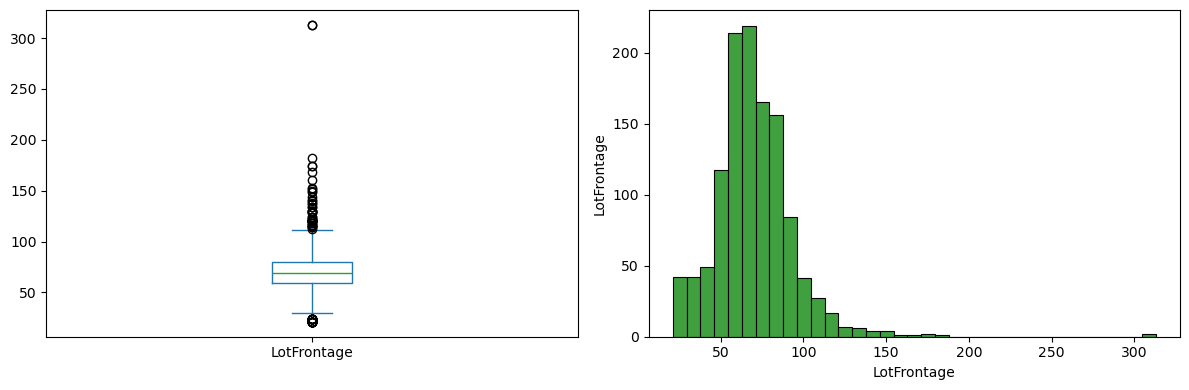

In [196]:
pd.set_option('display.max_rows', 35) 

histograma(dadosTreino, "LotFrontage", 35)